In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import init_simple_mdp as imdp

In [161]:
df = pd.read_csv('player10_results.csv')
df = df[['epsilon','tokens','score','optimal_value','optimal_policy']]

# Map to policy action names 
a_map = {i:imdp.a_list[i] for i in range(len(imdp.a_list))}
df['optimal_policy_name'] = df['optimal_policy'].map(a_map)

## Breakeven Point between Tokens and Epsilon 

TODO: Run with more epsilos (8,9,10)

In [175]:
df_501

,epsilon,tokens,score,optimal_value,optimal_policy,optimal_policy_name
501,1,0,501,15.854003,10,T20-c-m
1003,1,1,501,14.034670,10,T20-c-m
1505,1,2,501,13.355383,10,T20-c-m
2007,1,3,501,12.708747,10,T20-c-m
2509,1,4,501,12.062469,10,T20-c-m
...,...,...,...,...,...,...
53211,20,5,501,20.943630,431,T19-cw-i
53713,20,6,501,17.652792,431,T19-cw-i
54215,20,7,501,14.369852,771,T20
54717,20,8,501,11.124526,431,T19-cw-i


In [167]:
# Get dataframe only for score values at 501 
df_501 = df.loc[df.score==501]
#df_501 = df_501.loc[df_501.epsilon <= 10]

# Create dataframes for values at 501 for each token value 
token_dfs = []

for token in range(10):
    
    temp = df_501.loc[df_501.tokens==token].set_index('epsilon')['optimal_value'].copy()
    token_dfs.append(temp)

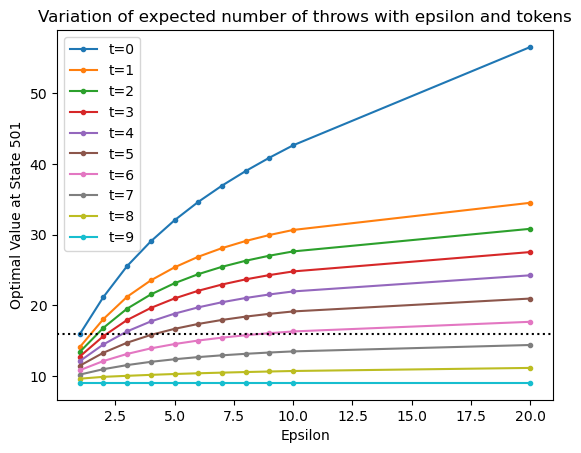

In [176]:
t_leg = []

# Plot each token line 
for token in range(10):
    t_leg.append('t={}'.format(token))
    fig = plt.plot(token_dfs[token],marker ='.')

fig = plt.title('Variation of expected number of throws with epsilon and tokens')
fig = plt.xlabel('Epsilon')
fig = plt.ylabel('Optimal Value at State 501')
fig = plt.legend(t_leg)

# Plot horizontal line for pro performance with e=1 and no tokens 
fig = plt.axhline(token_dfs[0][1],color='black',linestyle='dotted') 

## Token Usage

In [169]:
# Add boolean column to indicate whether the policy uses tokens or not 
df['policy_is_token'] = df['optimal_policy'] >= imdp.throw_num

epsilon_dfs = []

for epsilon in range(7):
    
    temp = df.loc[df.epsilon==epsilon].set_index('epsilon')['optimal_value'].copy()
    token_dfs.append(temp)


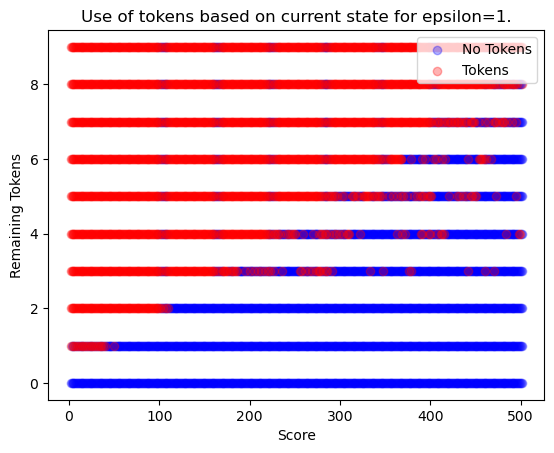

In [170]:
epsilon = 1
df_temp = df[df.optimal_policy != -1]
temp_tokens = df_temp.loc[df_temp.epsilon==epsilon].loc[df_temp.policy_is_token==True][['score','tokens']]
temp_notokens = df_temp.loc[df_temp.epsilon==epsilon].loc[df_temp.policy_is_token==False][['score','tokens']]
fig = plt.scatter(temp_notokens.score,temp_notokens.tokens,alpha=0.3,color='blue')
fig = plt.scatter(temp_tokens.score,temp_tokens.tokens,alpha=0.3,color='red')
fig = plt.legend(['No Tokens', 'Tokens'])
fig = plt.xlabel('Score')
fig = plt.ylabel('Remaining Tokens')
fig = plt.title('Use of tokens based on current state for epsilon={}.'.format(epsilon))

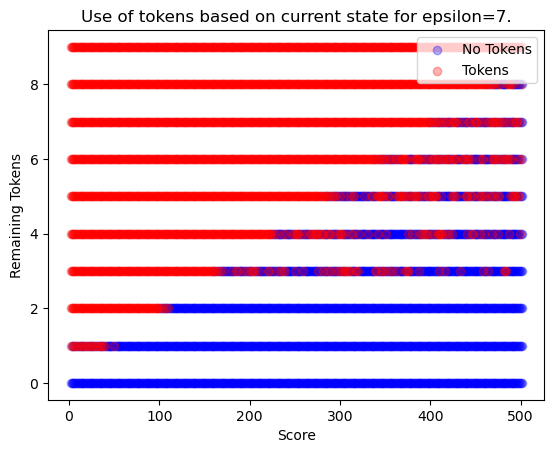

In [173]:
epsilon = 7
df_temp = df[df.optimal_policy != -1]
temp_tokens = df_temp.loc[df_temp.epsilon==epsilon].loc[df_temp.policy_is_token==True][['score','tokens']]
temp_notokens = df_temp.loc[df_temp.epsilon==epsilon].loc[df_temp.policy_is_token==False][['score','tokens']]
fig = plt.scatter(temp_notokens.score,temp_notokens.tokens,alpha=0.3,color='blue')
fig = plt.scatter(temp_tokens.score,temp_tokens.tokens,alpha=0.3,color='red')
fig = plt.legend(['No Tokens', 'Tokens'])
fig = plt.xlabel('Score')
fig = plt.ylabel('Remaining Tokens')
fig = plt.title('Use of tokens based on current state for epsilon={}.'.format(epsilon))

In [130]:
temp_1_notokens = df_temp.loc[df_temp.epsilon==1].loc[df_temp.policy_is_token==False]
temp_1_notokens[temp_1_notokens.tokens>2][:20]

,epsilon,tokens,score,optimal_value,optimal_policy,optimal_policy_name,policy_is_token
1605,1,3,99,3.000000,157,SI13-cc-m,False
1608,1,3,102,3.000000,132,SI4-cw-o,False
1609,1,3,103,3.000000,309,T2-cc-o,False
1611,1,3,105,3.000000,552,SI11-cc-o,False
1612,1,3,106,3.000000,669,T12-cc-o,False
1615,1,3,109,3.000000,669,T12-cc-o,False
1665,1,3,159,4.000000,10,T20-c-m,False
1668,1,3,162,4.000000,132,SI4-cw-o,False
1669,1,3,163,4.000000,240,SI10-cw-o,False
1671,1,3,165,4.000000,541,SI11-c-m,False


In [131]:
temp_1_notokens = df_temp.loc[df_temp.epsilon==7].loc[df_temp.policy_is_token==False]
temp_1_notokens[temp_1_notokens.tokens>2][0:20]

,epsilon,tokens,score,optimal_value,optimal_policy,optimal_policy_name,policy_is_token
31785,7,3,159,4.000000,728,DB-c,False
31788,7,3,162,4.000022,577,SI14-c-m,False
31791,7,3,165,4.000033,577,SI14-c-m,False
31792,7,3,166,4.000230,647,T9-cw-i,False
31794,7,3,168,4.004264,492,SI16-cw-o,False
31795,7,3,169,4.000236,647,T9-cw-i,False
31797,7,3,171,4.022104,465,T7-cw-o,False
31798,7,3,172,4.009591,515,T8-c-i,False
31799,7,3,173,4.031482,389,SO3-cw-i,False
31800,7,3,174,4.022380,465,T7-cw-o,False


In [128]:
temp_1 = df_temp.loc[df_temp.epsilon==1][['score','tokens','policy_is_token']]
temp_7 = df_temp.loc[df_temp.epsilon==7][['score','tokens','policy_is_token']]

pd.concat([temp_1,temp_7]).drop_duplicates(keep=False)

,score,tokens,policy_is_token
1605,99,3,False
1608,102,3,False
1609,103,3,False
1611,105,3,False
1612,106,3,False
...,...,...,...
35043,405,9,True
35044,406,9,True
35047,409,9,True
35097,459,9,True


0.32508396492086206

728